In [1]:
%matplotlib inline
import seaborn
from matplotlib import pyplot as plt
import matplotlib
seaborn.set(style="whitegrid")
seaborn.set_context('poster')

In [2]:
import simulate
import withdrawal
import market
import harvesting
import metrics

from decimal import Decimal as D
import decimal
import itertools
import pandas
import numpy

In [3]:
def run(market, stock_pct=D('.5'), length=30):
    start_year = market.start_year
    last_year = market.last_year - length
    swrs = pandas.Series()
    for _ in range(last_year - start_year + 2):
        returns = []
        for one_year in zip(range(length), market.iter_from(start_year + _)):
            annual_returns = one_year[1]
            stocks = ((1+annual_returns.stocks) / (1+annual_returns.inflation)) - 1
            bonds = ((1+annual_returns.bonds) / (1+annual_returns.inflation)) - 1
            returns.append((stocks * stock_pct) + (bonds * (1-stock_pct)))
        swr = float(metrics.pwa(100, 0, returns))
        swrs.loc[start_year+_] = swr
    return swrs

In [4]:
def plot(swrs, title):
    plt.figure(figsize=(20,10)) 
    ax = seaborn.lineplot(
                    data=swrs,
                   )
    min = swrs['SWR'].min()
    seaborn.despine(ax=ax, left=True, bottom=True, offset=20)
    ax.set_title(f'SWR in {title}. Min = {min:.1f}')

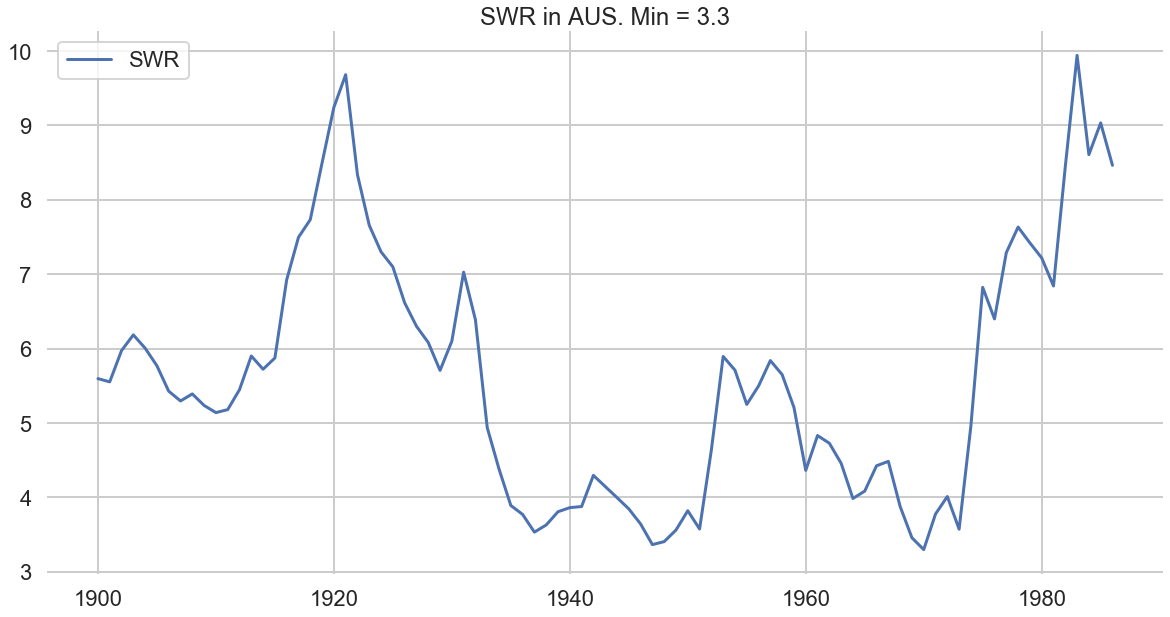

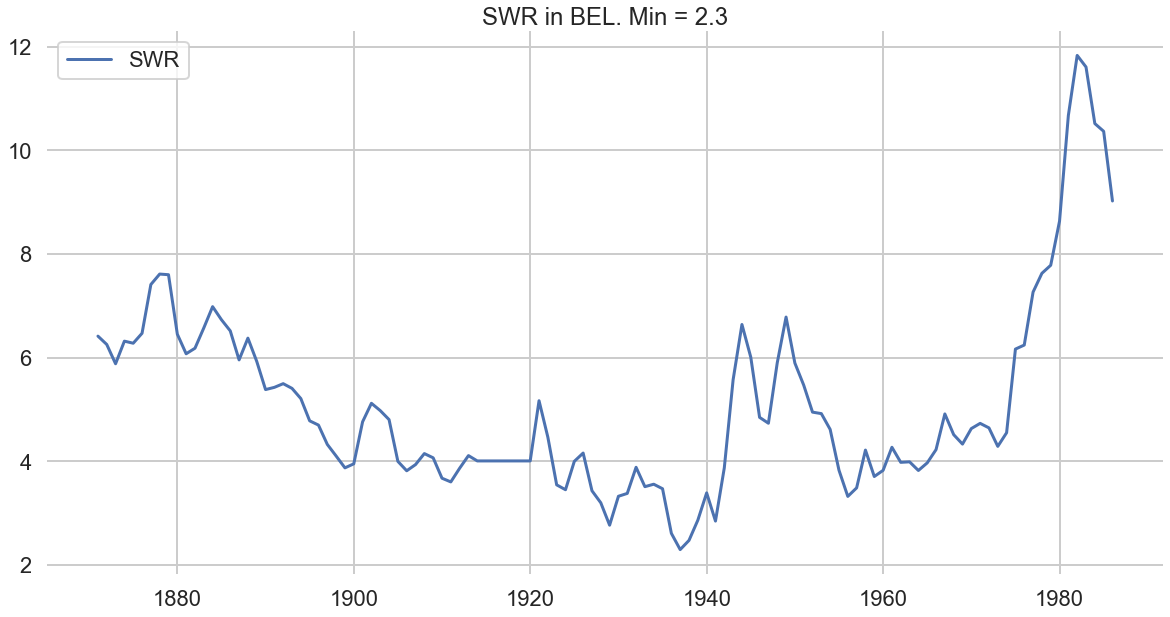

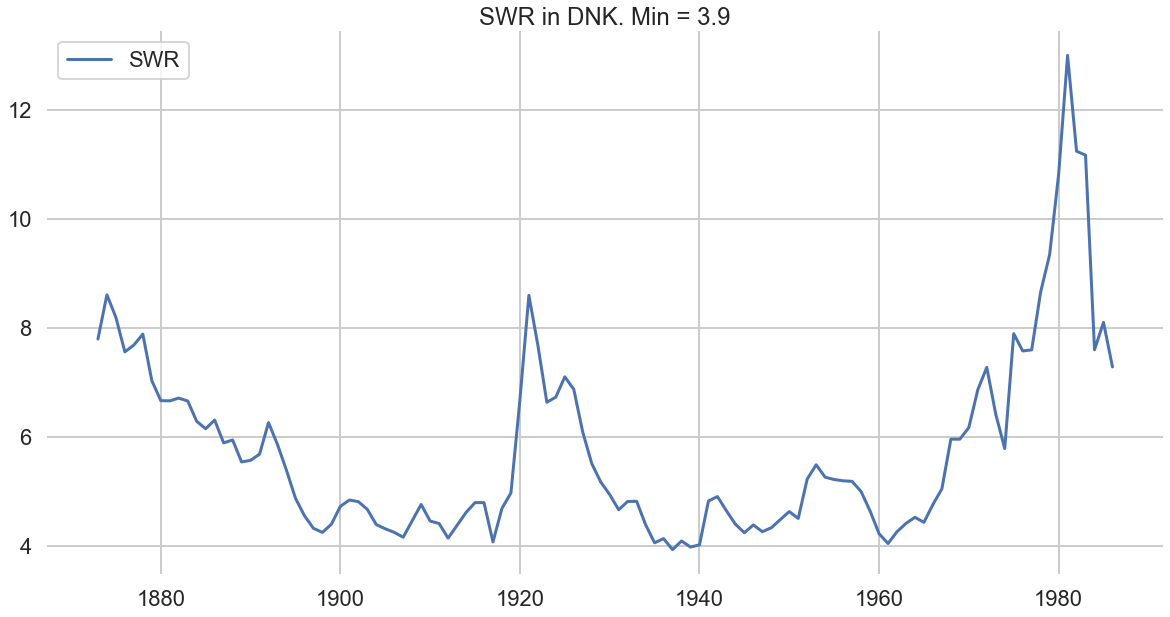

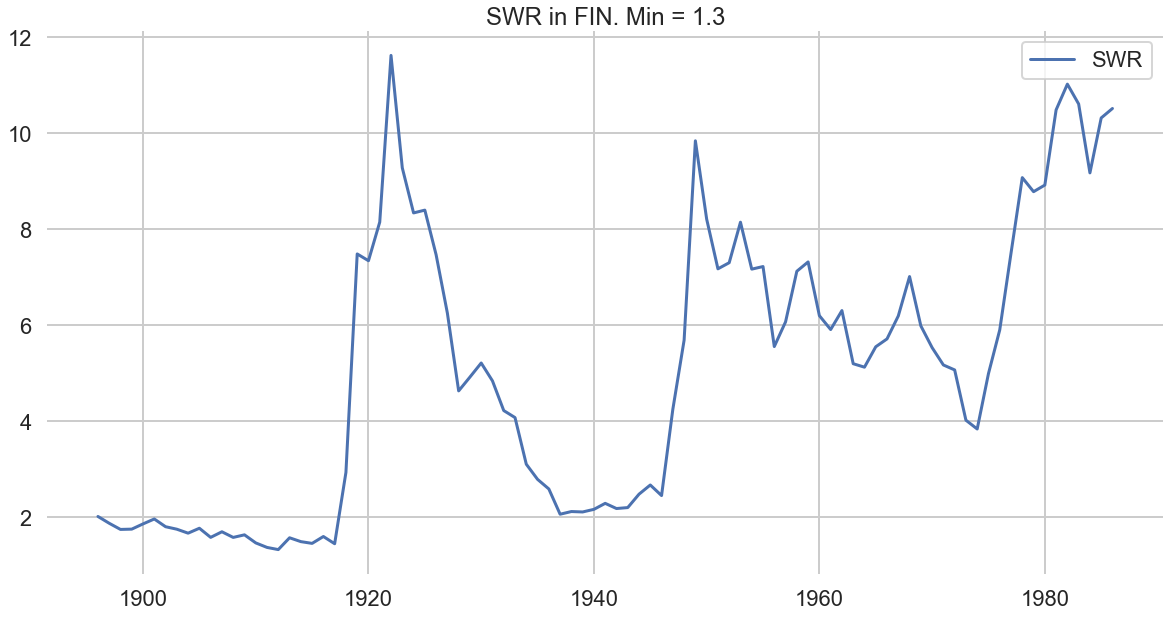

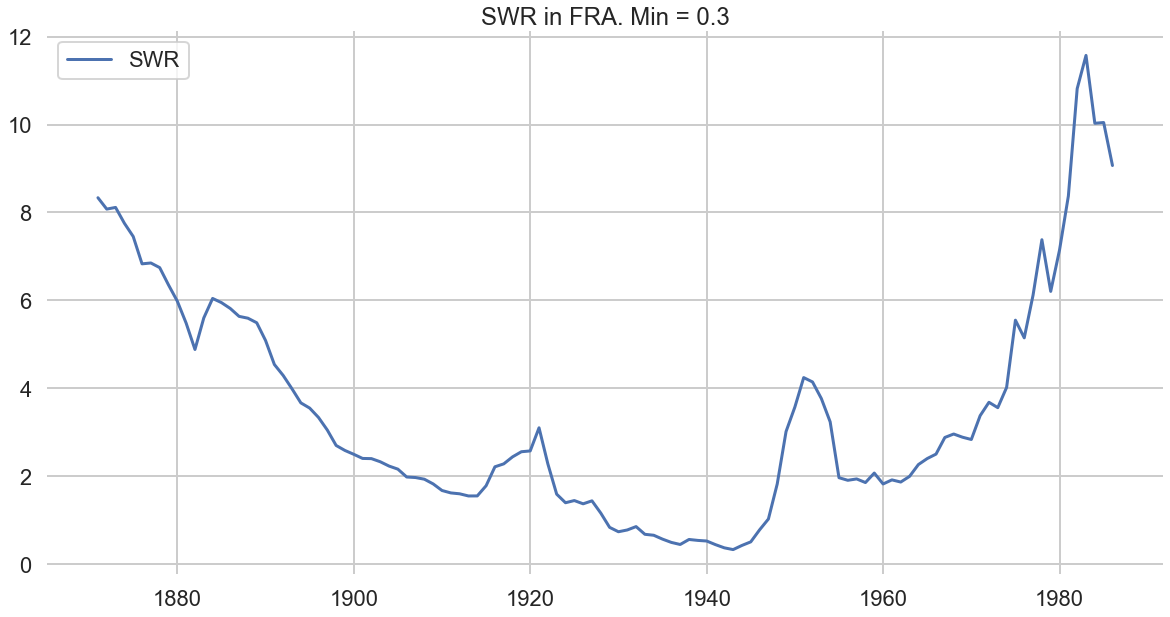

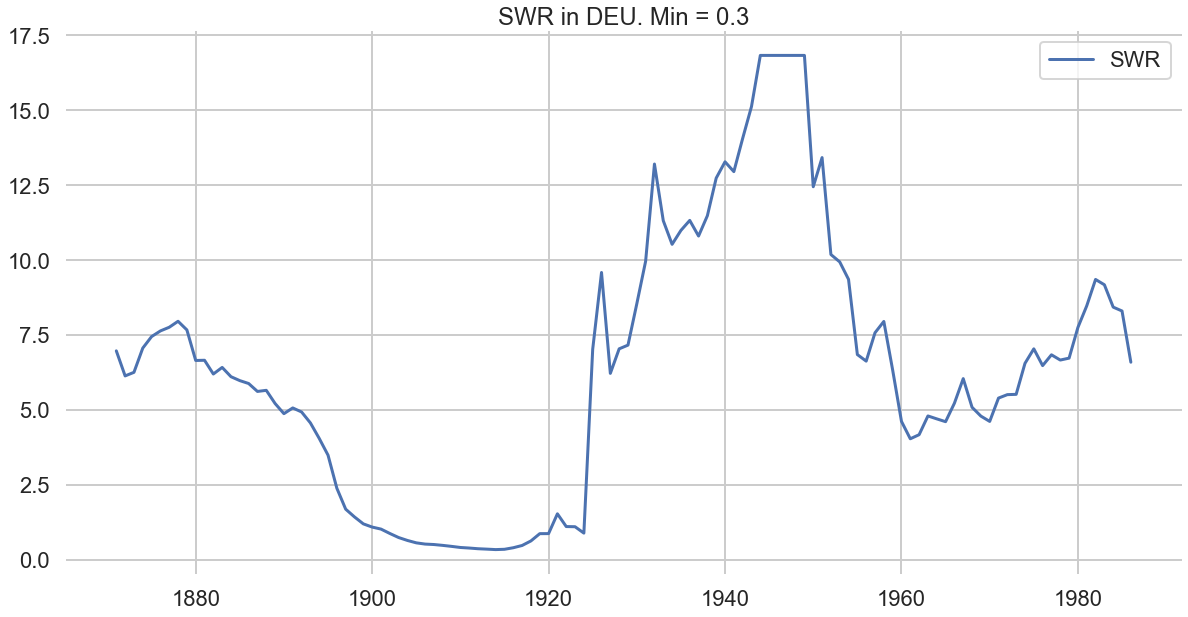

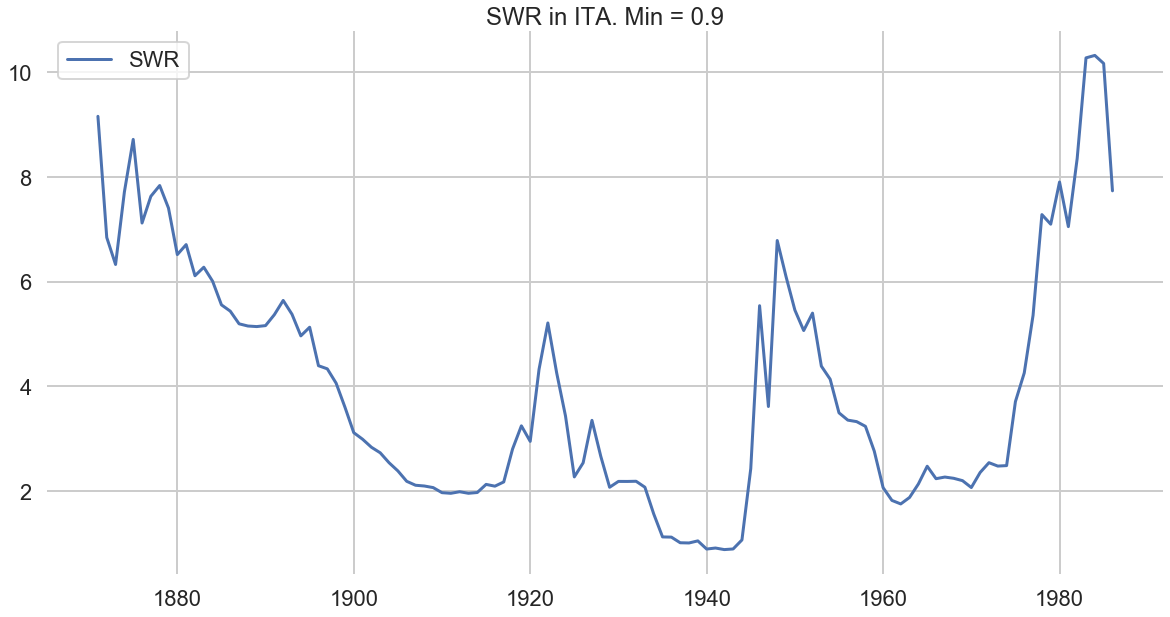

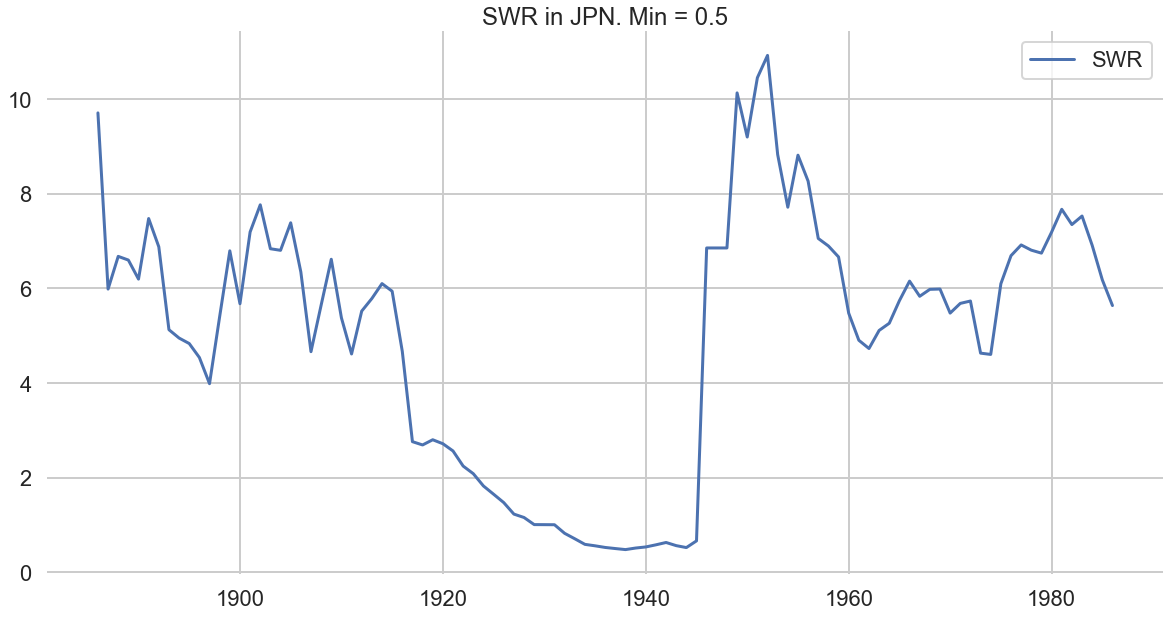

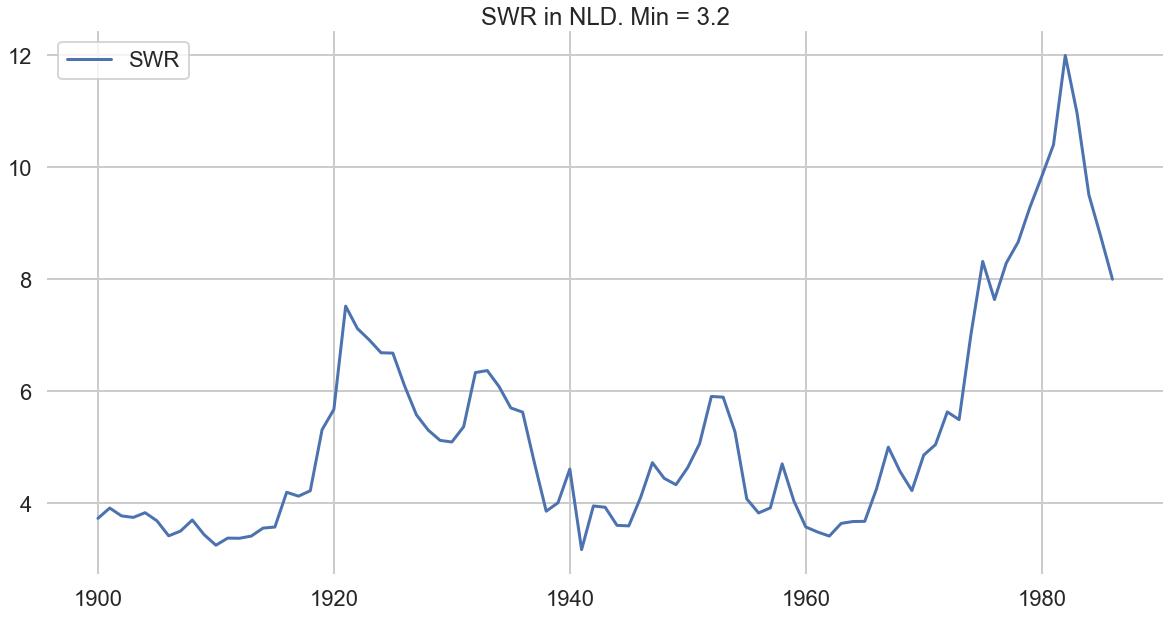

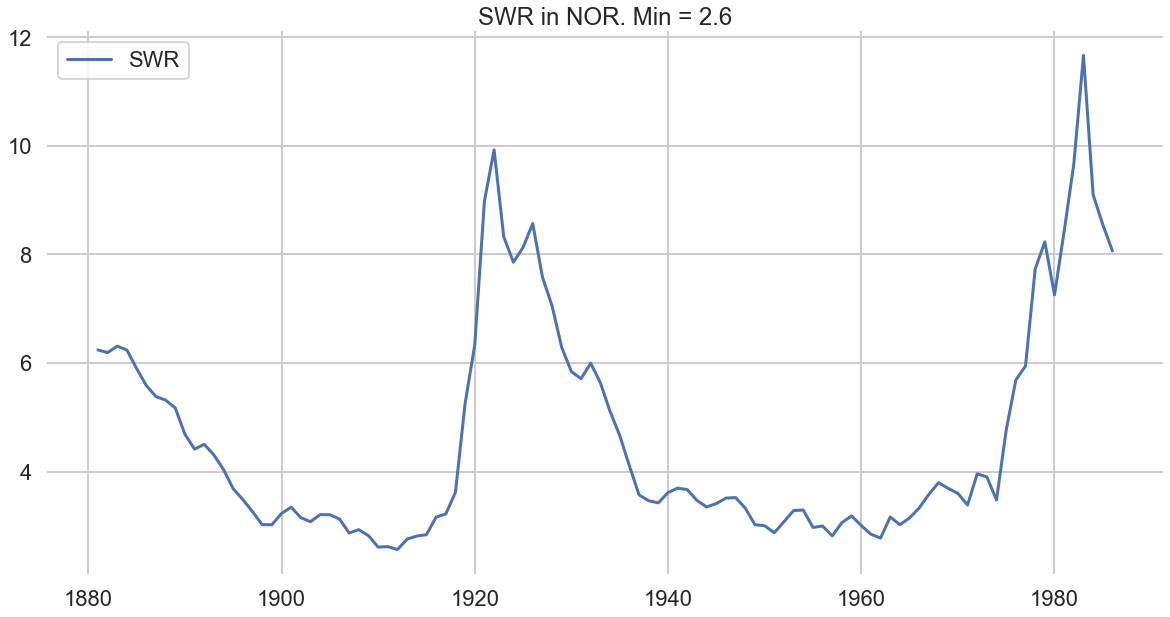

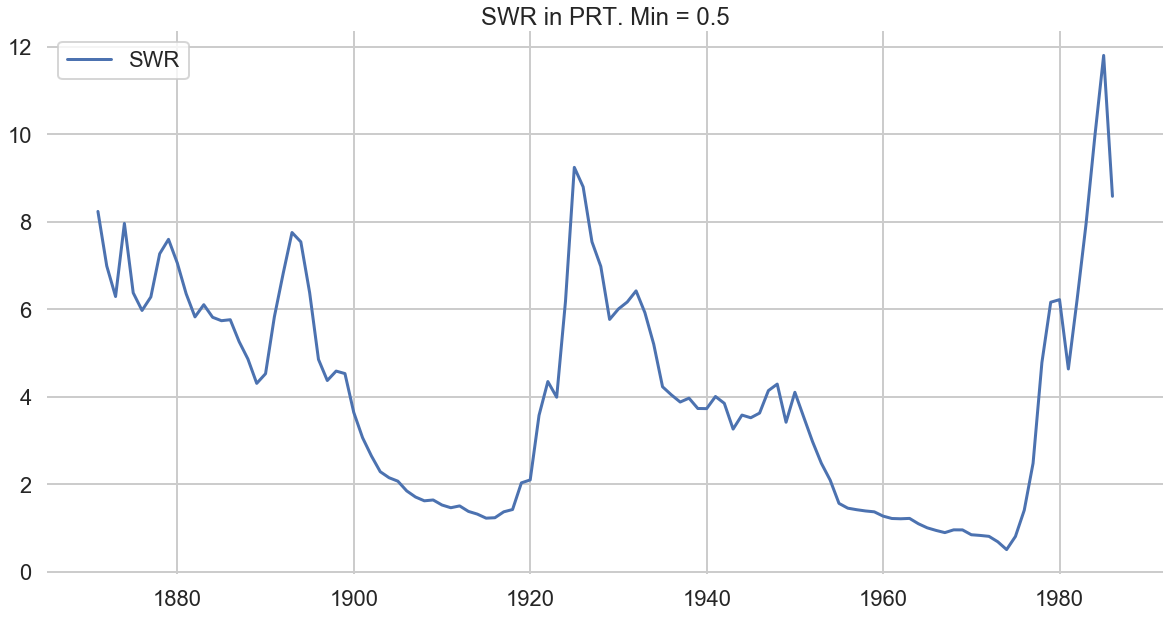

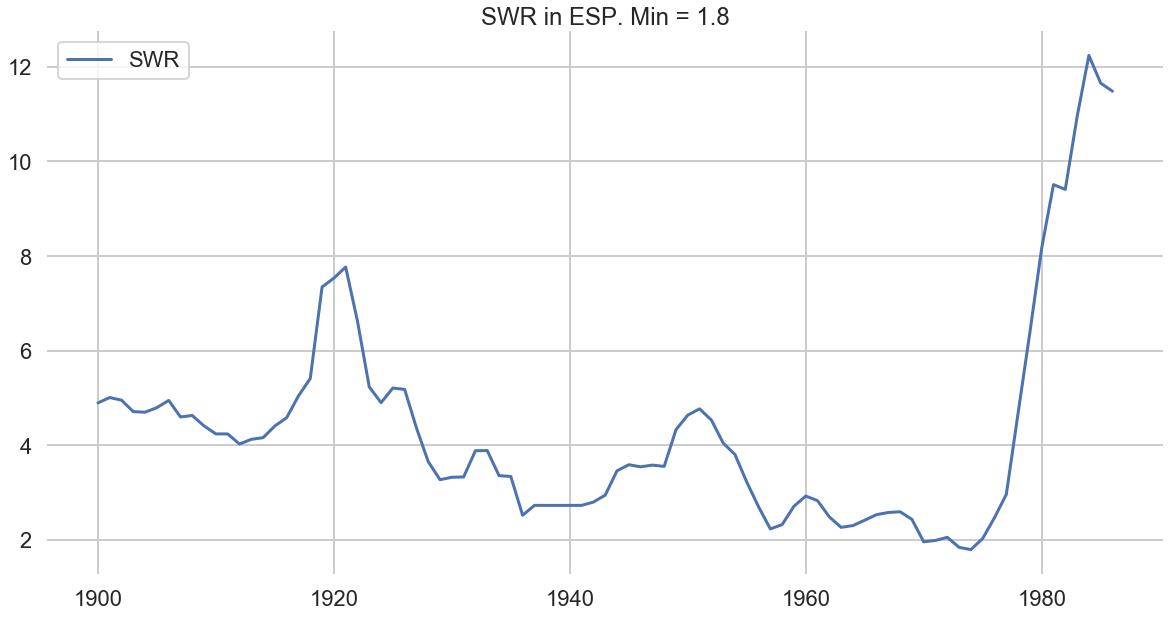

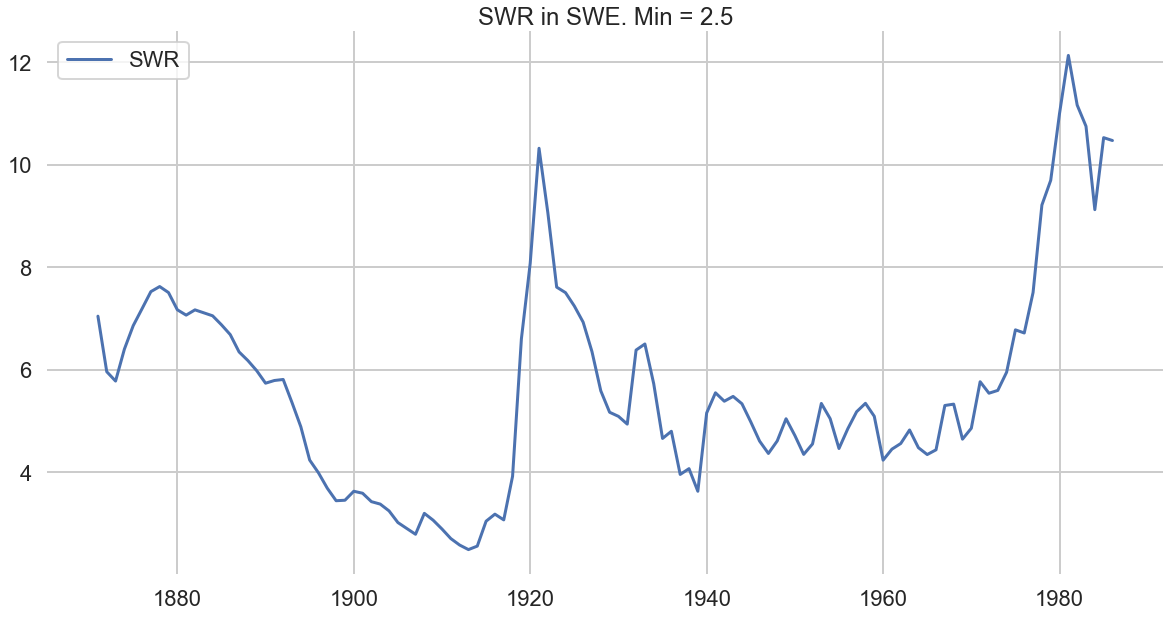

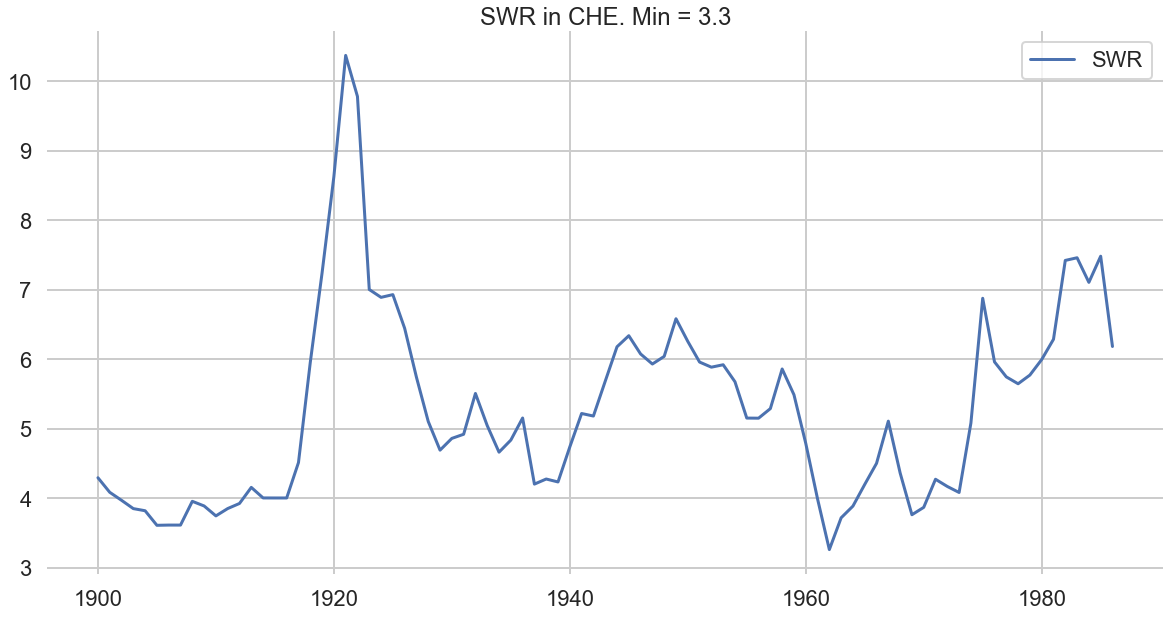

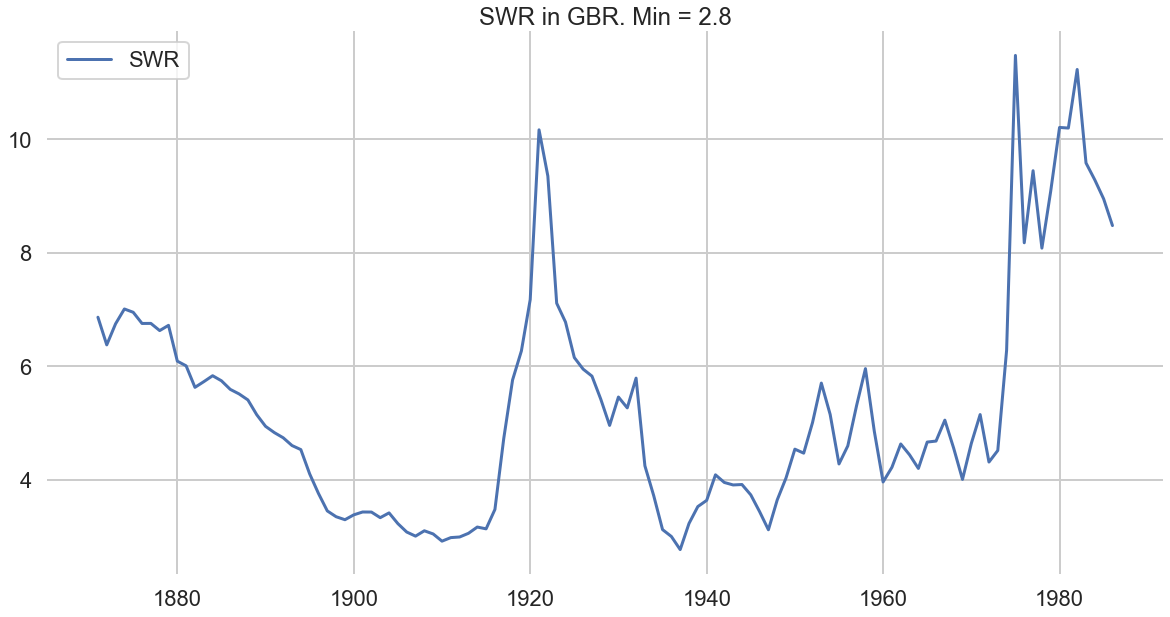

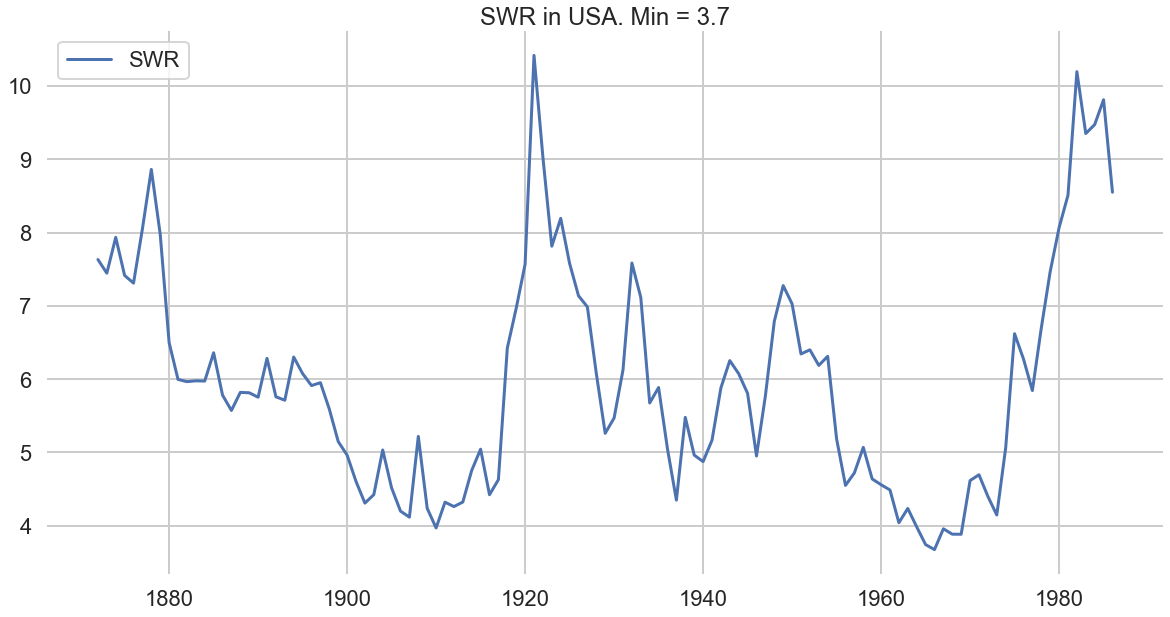

In [5]:
for country in market.JST.Countries:
    if country == 'CAN': continue
    m = market.JST(country)
    swrs = run(m)
    df = pandas.DataFrame(swrs, columns=['SWR'])
    plot(df, country)

In [13]:
MSWRS = pandas.Series(index=market.JST.Countries)

for country in market.JST.Countries:
    if country == 'CAN': continue
    m = market.JST(country)
    m.start_year = 1950
    swrs = run(m)
    mswr = swrs.min()
    MSWRS.loc[country] = mswr

In [14]:
MSWRS.sort_values(ascending=False)

JPN    4.606674
SWE    4.239777
DNK    4.040959
DEU    4.035451
GBR    3.961606
FIN    3.838599
USA    3.672566
NLD    3.414688
BEL    3.320302
AUS    3.298490
CHE    3.260336
NOR    2.775738
FRA    1.822675
ESP    1.794782
ITA    1.753334
PRT    0.509965
CAN         NaN
dtype: float64